### T-Tests and ANOVA

* One Sample T-Test
* Independent Samples t-test
* paired samples t-test

#### Hypothesis testing is crucial for evaluating outcomes and making data-driven decisions. It involves formulating a null hypothesis (assuming no effect) and an alternative hypothesis (proposing an effect exists). One-tailed and two-tailed tests are two key approaches in hypothesis testing.]

#### A T-test is a statistical method used to compare the means of two groups and determine if the differences between them are statistically significant. It’s widely used in hypothesis testing when you want to assess whether observed differences between sample means are likely due to chance or reflect a real effect.

##### Assumptions in T-test:
* Independence: the observations within each group must be independent of each other means that the value of one observation should not influence the value of another observation
*  Normality: the data within each group should be approximately normally distributed (i.e. the data within each group being compared should resemble a normal bell-shaped distribution
*  Homogeneity of Variances: the variances of the two groups should be equal. This assumption ensures that the groups have a similar spread of values
*  Absence of Outliers: There should be no outliers in the data as outliers can influence the results especially when the sample sizes are small

##### Prerequisites for T-Test:
1. Hypothesis testing is a statistical method used to make inferences about a population based on  a sample of data
2. P-Value: the probability of observing a test statistic given that the null hypothesis is true
    * a small p-value usually less than 0.05 means that the results are unlikely to be due to random chance so we reject the null hypothesis
    *  a large p-value means the results could easily happen by chance so we don't reject the null hypothesis
3. Degree of freedom (df): The degree of freedom tells us the number of variables for calculating the estimate between 2 sample groups. in a t-test, the degree of freedom is calculated as the total sample size minus 1. Suppose we have 2 samples, A and B. the degree of freedom would be calculated as df= (nA-1) + (nB-1)
4. significance level is the predetermined threshold that is used to decide whether to reject the null hypothesis. commonly used significant levels are 0.05,0.01, or 0.10
5. T-Statistic is a measure of the difference between the means of two groups. it is calculated as the difference between the sample means divided by the standard error of the difference. it is also known as the t-value or the t-score
   * if the t-value is large --> the two groups below to different groups
   *  if the t-value is small --> the two groups belong to the same group
6. T-Distribution is a probability distribution with tails that are thicker than those of the normal distribution
7. Critical T Value is the Decision Threshold
    * the cutoff value from the t-distribution table that tells whether our t-value is extreme enough to reject the  null hypothesis
        * depends on Alpha and the Degrees of Freedom
8. Statistical Significance is determined by comparing the p-value to the chosen significance level.
    * if the p-value is less than or equal to the significance level, the result is considered statistically significant and the null hypothesis is rejected.
    *  if the p-value is greater than the significance level, the result is not statistically significant and there is insufficient evidence to reject the null hypothesis.


##### A t-table, or a t-distribution table, is a reference table that provides critical values for the t-test. The table is organized by degrees of freedom and significance levels (usually 0.05 or 0.01). The t-table is used to find the critical t-value corresponding to their specific degrees of freedom and chosen significance level. 

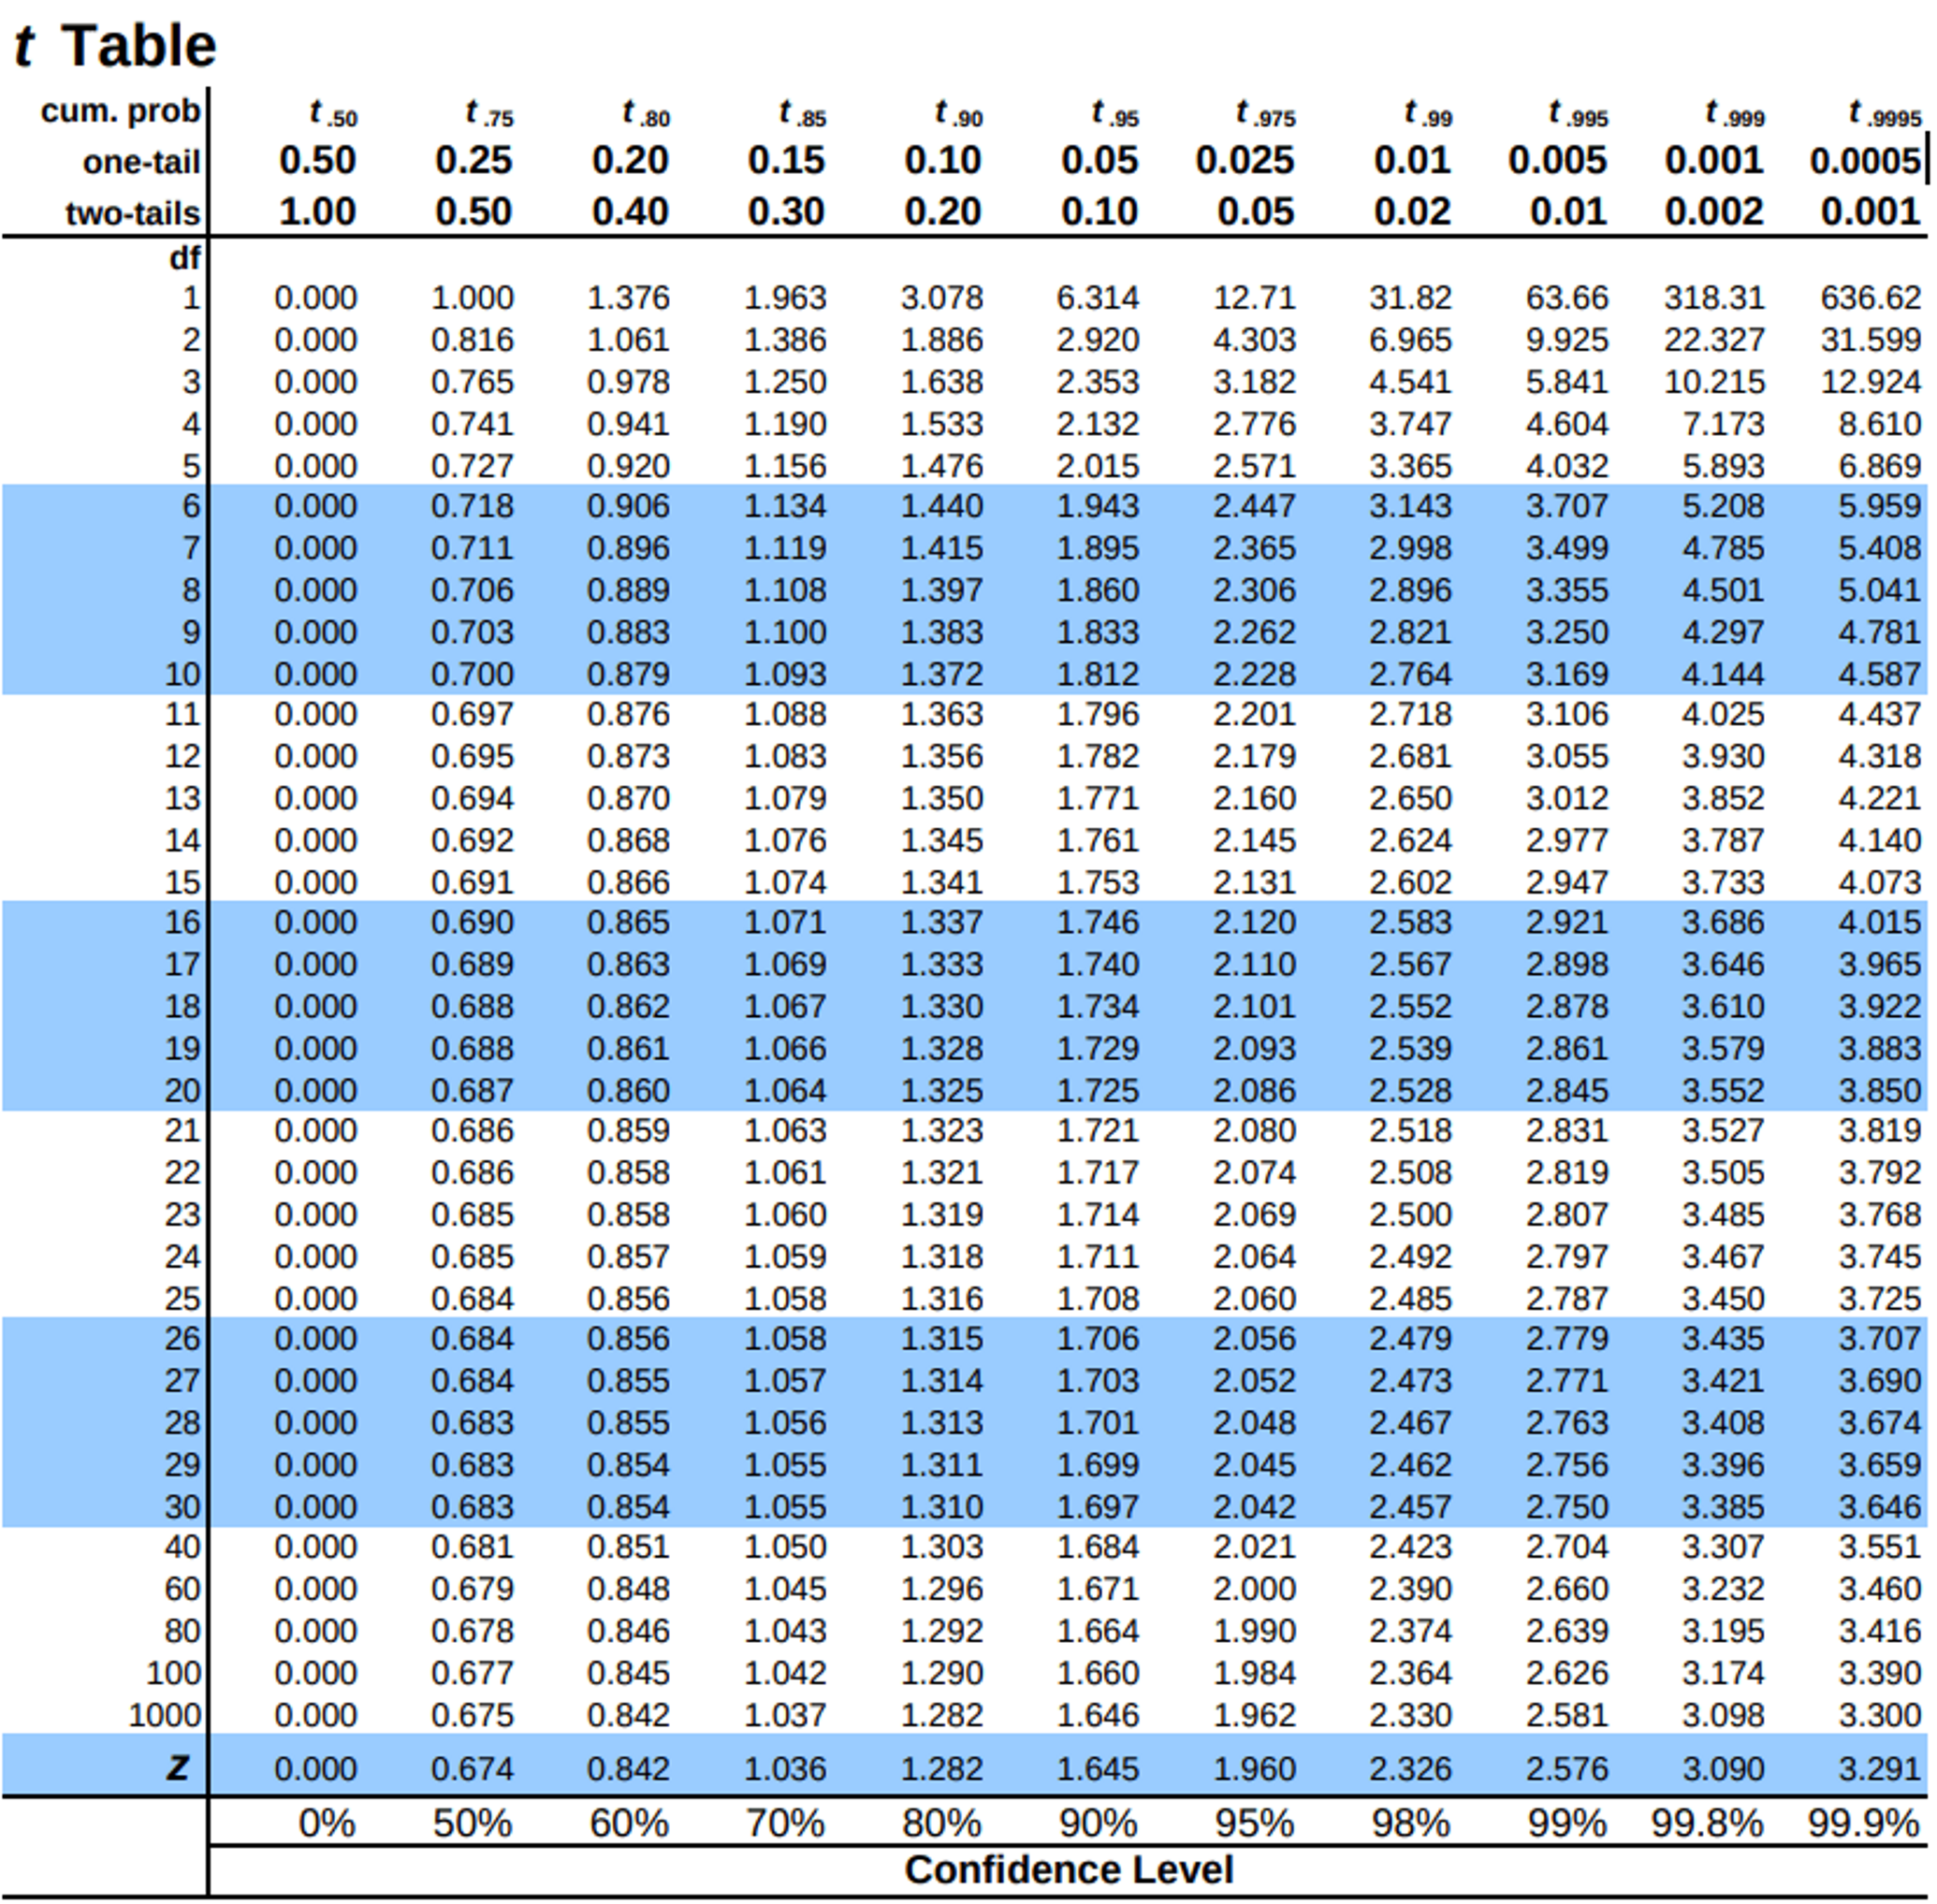

In [300]:
import pandas as pd
import scipy.stats as stats
# Perform Independent-Samples T-Test 
from scipy.stats import ttest_ind
import numpy as np 


# For Post Hoc ANOVA Analysis
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison as multi

### Types of T-Tests 

There are three types of t-tests and they are categorized as dependent and independent t-tests

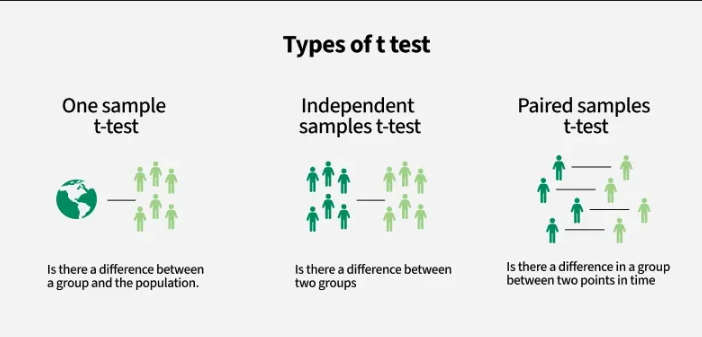

### One Sample T-Test

Used for comparison of the sample mean of the data to a particularly given value or population mean. we can use this when the sample size is small .
	 (under 30) data is collected randomly and it is approximately normally distributed. it can be calculated as

 $ t = \frac{\bar{x} - \text{reference value}}{S / \sqrt{n}}$

        
where: 
			§ ¯x   is the sample mean
			§ s is standard deviation
			§ n is number of cases


In [11]:
# one sample t-test example: The weights of 25 obese people were taken before enrolling them into the nutrition camp. 
#The population mean weight is found to be 45 kg before starting the camp. 
#After finishing the camp for the same 25 people the sample mean was found to be 75 with a standard deviation of 25. 
#Did the fitness camp work?

population_mean = 45

sample_mean = 75
sample_std = 25

sample_size = 25

#calculate the difference between the mans of the two groups
t_statistic = (sample_mean - population_mean) / (sample_std / np.sqrt(sample_size))

#degree of freedom
df = sample_size - 1 

#significant level 
alpha = 0.05

critical_t = stats.t.ppf(1 - alpha, df)

p_value = 1 - stats.t.cdf(t_statistic, df)



print('With T-value :')
if t_statistic > critical_t:
    print("""There is a significant difference in weight before and after the camp. 
    The fitness camp had an effect.""")
else:
    print("""There is no significant difference in weight before and after the camp. 
    The fitness camp did not have a significant effect.""")

print('With P-value :')
if p_value > alpha:
    print("""There is a significant difference in weight before and after the camp. 
    The fitness camp had an effect.""")
else:
    print("""There is no significant difference in weight before and after the camp. 
    The fitness camp did not have a significant effect.""")


T-Statistic: 6.0
Critical t-value: 1.7108820799094275
P-Value: 1.703654035845048e-06
0.05
With T-value :
There is a significant difference in weight before and after the camp. 
    The fitness camp had an effect.
With P-value :
There is no significant difference in weight before and after the camp. 
    The fitness camp did not have a significant effect.


### Independent Sample T-Test

An independent sample t-test commonly known as an  unpaired sample t-test is used to find out if the differences found between two groups is actually significant or 
just a random occurrence. We can use this when:
	• the population mean or standard deviation is unknown (info about the population is unknown)
	• the two samples are separated/independent (ex. boys and girls) 

it can be calculated using: 


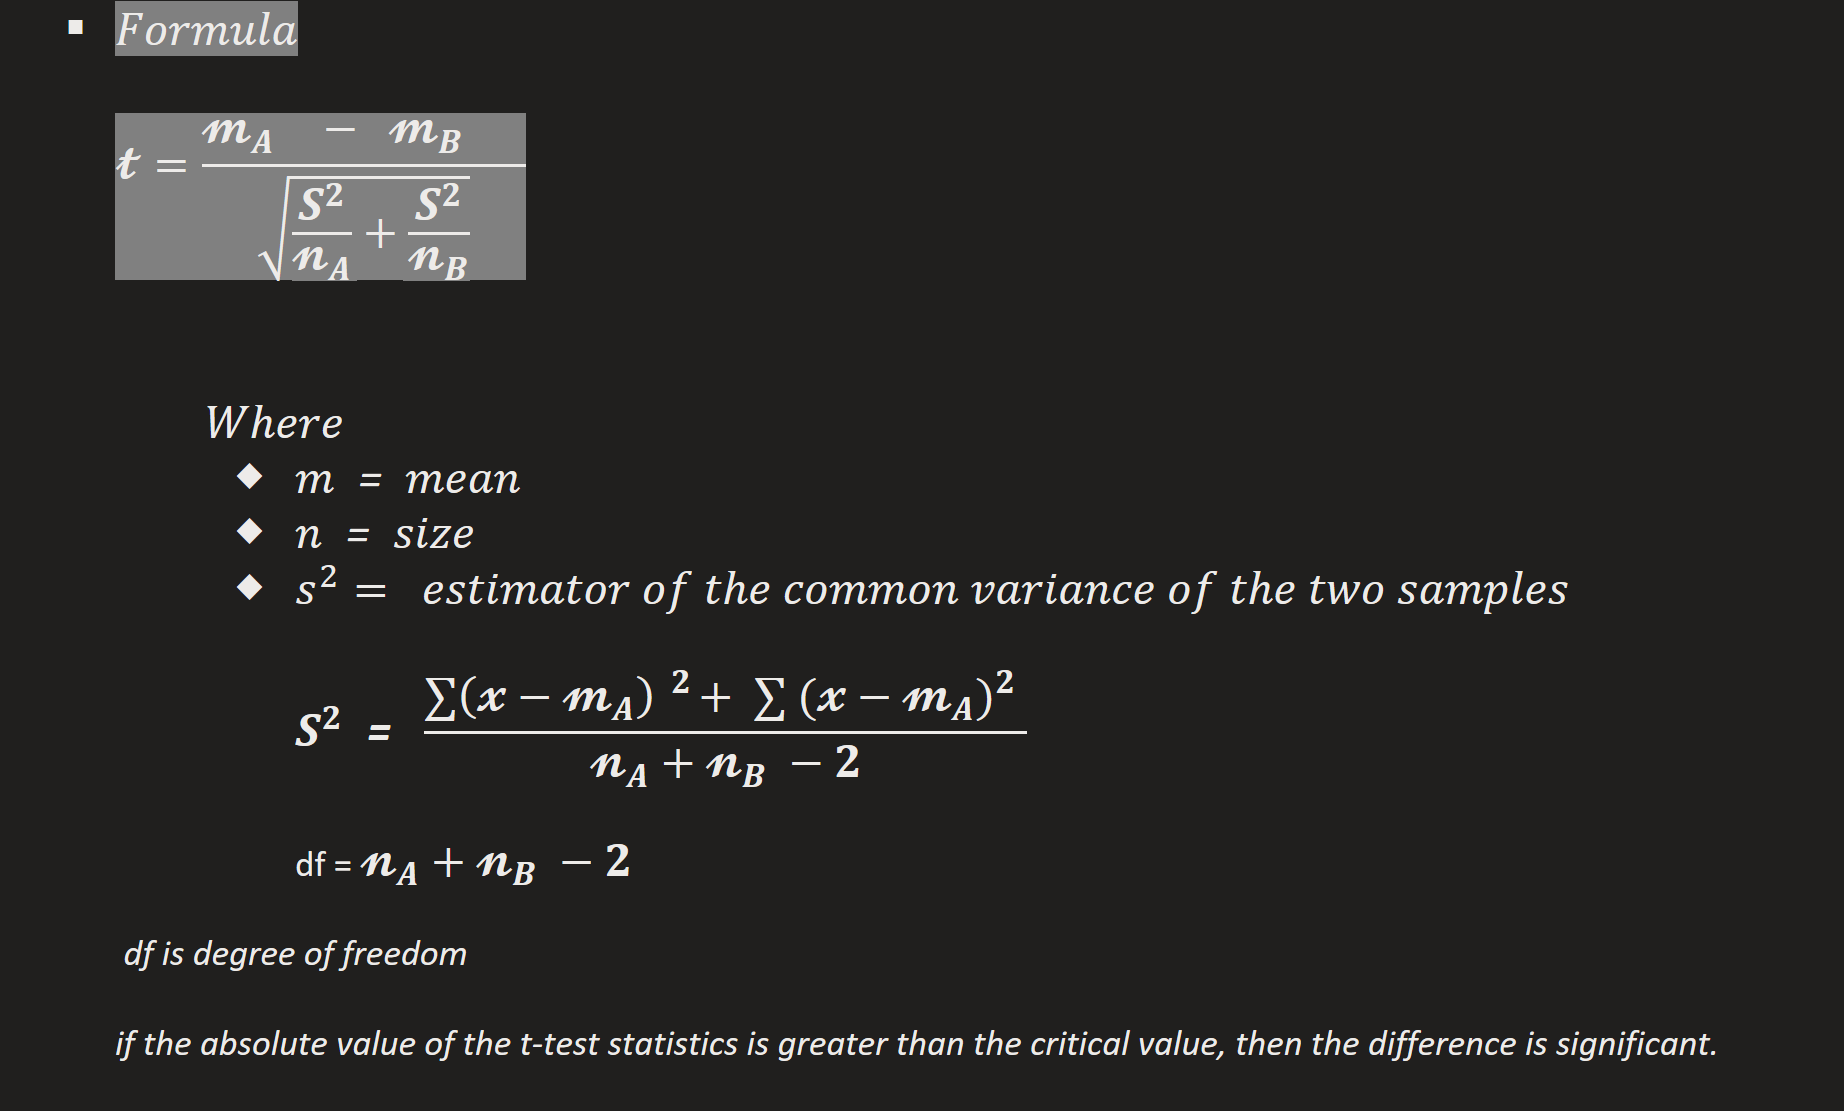



Independent T−Test: Compares the means of two independent groups (e.g., two different populations)

In [ ]:
#indepdenent t-test example

sample_A = np.array([78,84,92,88,75,80,85,90,87,7978,84,92,88,75,80,85,90,87,79])
sample_B = np.array([82,88,75,90,78,85,88,77,92,8082,88,75,90,78,85,88,77,92,80])

t_statistic, p_value = stats.ttest_ind(sample_A, sample_B)

alpha = 0.05
df = len(sample_A)+len(sample_B)-2

# Determine Equal Variance by testing if (the Larger Stand Deviation / the smaller Standard Deviation) > 2
# Assume equal variance unless (the Larger Stand Deviation / the smaller Standard Deviation) > 2

EqualVar = True
if sample_A.std() >sample_B.std():
    if (sample_A.std() / sample_B.std()) > 2:
        EqualVar = False
else:
    if (sample_B.std() / sample_A.std()) > 2:
        EqualVar = False

# Obtain T-Stat and Pvalue 

t_statistic, p_value = stats.ttest_ind(sample_A, sample_B,equal_var=EqualVar)

critical_t = stats.t.ppf(1 - alpha/2, df)

print("T-value:", t_statistic)
print("P-Value:", p_value)
print("Critical t-value:", critical_t)
print("Equal Variance", EqualVar)

print('With T-value')
if np.abs(t_statistic) >critical_t:
    print('There is significant difference between two groups')
else:
    print('No significant difference found between two groups')

print('With P-value')
if p_value >alpha:
    print('No evidence to reject the null hypothesis that a significant difference between the two groups')
else:
    print('Evidence found to reject the null hypothesis that a significant difference between the two groups')

In [187]:
sample_A.shape

(19,)

### Paired Sample T-Test

Paired  sample t-test is also known as a dependent t-test is used to find out if the difference in the mean of two samples is 0. The test is done on dependent samples usually focusing on
a particular group of people or things. In this, each entity is measured twice resulting in a pair of observations

We can use this when:
	§ two similar samples are given (e.g. scores obtained in English and Math)
	§ the dependent variable data is continuous
	§ the observations are independent of one another
	§ the dependent variable is approximately normally distributed

it can be calculated as: 

* ○ Compares the means of two related groups, such as measurements before and after treatment on the same subjects.

$t = \frac{m}{s / \sqrt{n}}$
- $d$ = the difference between all pairs  
- $m$ = mean of the differences ($d$)  
- $s$ = standard deviation of the differences ($d$)  
- $n$ = number of paired differences  
$\text{df} = n - 1$


if the absolute value of the t-test statistics is greater than the critical value, then the difference is significant

the average of the difference d is compared to 0. if there is any significant difference between the two pairs of samples, hen the mean of d Is expected to be far from 0


In [19]:
#paired T test example

from scipy import stats
import numpy as np

math1 = np.array([4, 4, 7, 16, 20, 11, 13, 9, 11, 15])
math2 = np.array([15, 16, 14, 14, 22, 22, 23, 18, 18, 19])

t_statistic, p_value = stats.ttest_rel(math1, math2)

alpha = 0.05
df = len(math2)-1

critical_t = stats.t.ppf(1 - alpha/2, df)

print("T-value:", t_statistic)
print("P-Value:", p_value)
print("Critical t-value:", critical_t)

print('With T-value')
if np.abs(t_statistic) >critical_t:
    print('There is significant difference between math1 and math2')
else:
    print('No significant difference found between math1 and math2')

print('With P-value')
if p_value >alpha:
    print('No evidence to reject the null hypothesis that significant difference between math1 and math2')
else:
    print('Evidence found to reject the null hypothesis that significant difference between math1 and math2')

T-value: -4.953488372093023
P-Value: 0.0007875235561560145
Critical t-value: 2.2621571628540993
With T-value
There is significant difference between math1 and math2
With P-value
Evidence found to reject the null hypothesis that significant difference between math1 and math2


In [35]:
anxiety = pd.read_csv('enhanced_anxiety_dataset.csv')


anxiety.columns

Index(['Age', 'Gender', 'Occupation', 'Sleep Hours',
       'Physical Activity (hrs/week)', 'Caffeine Intake (mg/day)',
       'Alcohol Consumption (drinks/week)', 'Smoking',
       'Family History of Anxiety', 'Stress Level (1-10)', 'Heart Rate (bpm)',
       'Breathing Rate (breaths/min)', 'Sweating Level (1-5)', 'Dizziness',
       'Medication', 'Therapy Sessions (per month)', 'Recent Major Life Event',
       'Diet Quality (1-10)', 'Anxiety Level (1-10)'],
      dtype='object')

In [219]:
anxiety.head()

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level
0,29,Female,Artist,6.0,2.7,181,10,Yes,No,10,114,14,4,No,Yes,3,Yes,7,5.0
1,46,Other,Nurse,6.2,5.7,200,8,Yes,Yes,1,62,23,2,Yes,No,2,No,8,3.0
2,64,Male,Other,5.0,3.7,117,4,No,Yes,1,91,28,3,No,No,1,Yes,1,1.0
3,20,Female,Scientist,5.8,2.8,360,6,Yes,No,4,86,17,3,No,No,0,No,1,2.0
4,49,Female,Other,8.2,2.3,247,4,Yes,No,1,98,19,4,Yes,Yes,1,No,3,1.0


In [37]:
anxiety.rename(columns = {'Anxiety Level (1-10)':'Anxiety Level'},inplace=True)

In [87]:
anxietygender = anxiety[['Gender','Anxiety Level']]
anxietygender = anxietygender.query('Gender == "Female" or Gender == "Male"')

In [89]:
anxietygender = anxietygender.sort_values("Gender")

anxietygender.reset_index(inplace=True)

In [95]:
anxietygender.query('Gender == "Female"')

,index,Gender,Anxiety Level
0,0,Female,5.0
1,8680,Female,4.0
2,4543,Female,6.0
3,8679,Female,6.0
4,4545,Female,1.0
...,...,...,...
3725,2306,Female,2.0
3726,2164,Female,8.0
3727,2113,Female,3.0
3728,9920,Female,3.0


In [147]:
anxietygender.iloc[3730:]['Gender']

3730    Male
3731    Male
3732    Male
3733    Male
3734    Male
        ... 
7382    Male
7383    Male
7384    Male
7385    Male
7386    Male
Name: Gender, Length: 3657, dtype: object

In [93]:
anxietygender['Gender'].value_counts()

Gender
Female    3730
Male      3657
Name: count, dtype: int64

In [189]:
fanxietyarray = np.array(anxietygender.iloc[0:3657]['Anxiety Level'])
manxietyarray = np.array(anxietygender.iloc[3730:]['Anxiety Level'])

In [191]:
fanxietyarray.shape

(3657,)

In [193]:
#set alpha, calc degree of freedom, check that variances are equal
alpha = 0.05
degreef= len(fanxietyarray)+len(manxietyarray)-2

EqualVar = True

if fanxietyarray.std()/manxietyarray.std() > 2:
    EqualVar = False
else:
    if manxietyarray.std()/fanxietyarray.std() >2:
        EqualVar = False

In [203]:
#calculate t-statistic, critical t

sample_t,pval = ttest_ind(fanxietyarray,manxietyarray, equal_var = EqualVar)

critical_t = stats.t.ppf(1-alpha/2,degreef)


0.9301972031054336

In [205]:
print(f'T-Score: {sample_t}\n\
P-Value: {pval}\nCritical-T: {critical_t}')

T-Score: -0.08759974569220362
P-Value: 0.9301972031054336
Critical-T: 2.2621571628540993


In [217]:
print(f"With T-Value:")
if np.abs(sample_t) > critical_t:
    print(f'There is a significant difference in anxiety levels between men and women')
else:
    print(f'There is no a significant difference in anxiety levels between men and women')

print(f'With P-Value:')
if pval > alpha:
    print(f'No evidence to reject the null hypothesis. There was no statistically significant difference in anxiety levels between\
 men and women.')
else:
    print(f'There is evidence to reject the null hypothesis')

With T-Value:
There is no a significant difference in anxiety levels between men and women
With P-Value:
No evidence to reject the null hypothesis. There was no statistically significant difference in anxiety levels between men and women.


### Left vs. Right Tail Analysis

| Tail | What you're testing | Example |
|------|---------------------|---------|
| **Right tail** | Is B significantly HIGHER than A? | "Did the new feature increase conversion?" |
| **Left tail** | Is B significantly LOWER than A? | "Did the new feature decrease bounce rate?" |
| **Two-tailed** | Is B significantly DIFFERENT from A (either direction)? | "Did the new feature change conversion at all?" |

In [281]:
# Convert to left-tailed p-value
sample_t,pval_left_tailed = ttest_ind(fanxietyarray,manxietyarray, alternative = 'less' ,equal_var = EqualVar)

#convert to right-tailed pval
sample_t,pval_right_tailed = ttest_ind(fanxietyarray,manxietyarray, alternative = 'greater', equal_var = EqualVar)

print("T-Statistic:", sample_t)
print("Right-Tailed P-Value:", pval_right_tailed)
print("Left-Tailed P-Value:", pval_left_tailed)


T-Statistic: -0.08759974569220362
Right-Tailed P-Value: 0.5349013984472831
Left-Tailed P-Value: 0.4650986015527168


In [283]:
# Decision rule for right-tailed test
print("Right Tailed Results")
if pval_right_tailed < alpha:
    print("Significant difference: Group A has a higher mean than Group B.")
else:
    print("No significant difference: Group A is not significantly higher than Group B.")

print("Left Tailed Results")
if pval_left_tailed < alpha:
    print("Significant difference: Group A has a lower mean than Group B.")
else:
    print("No significant difference: Group A is not significantly lower than Group B.")


Right Tailed Results
No significant difference: Group A is not significantly higher than Group B.
Left Tailed Results
No significant difference: Group A is not significantly lower than Group B.


In [231]:
#practice paired sample t-test

heartrate = pd.read_csv("heart_rate_data.csv")

display(heartrate.head())

,Age,Sleep Hours,Exercise Frequency (Days/Week),Resting Heart Rate Before,Resting Heart Rate After,Max Heart Rate During Exercise
0,37,9.1,7,78,71,142
1,46,7.8,5,80,73,153
2,27,7.1,3,56,50,153
3,51,10.7,4,67,61,145
4,32,6.6,6,85,76,140


In [255]:
hrbefore=np.array(heartrate['Resting Heart Rate Before'])
hrafter = np.array(heartrate['Resting Heart Rate After'])
degfree = len(hrafter)-1

In [257]:
hrpairedt,hrpval = stats.ttest_rel(hrbefore,hrafter)
hrcritt= stats.t.ppf(1-alpha/2,degfree)

print(f'Heart Rate T-Score: {hrpairedt}\n Heart Rate P-Value: {hrpval}\n Heart Rate Critical T: {hrcritt}')

Heart Rate T-Score: 80.54043235396121
 Heart Rate P-Value: 4.106358433141536e-288
 Heart Rate Critical T: 1.9647293909876649


In [263]:

print('With T-value')
if np.abs(hrpairedt) >hrcritt:
    print('There is a significant difference before and after exercise')
else:
    print('No significant difference before and after exercise')

print('With P-value')
if hrpval > alpha:
    print('Reject the null hypothesis')
else:
    print('No evidence found to reject the null hypothesis')

With T-value
There is significant difference before and after exercise
With P-value
No evidence found to reject the null hypothesis


In [267]:
hrbefore=np.array(heartrate['Resting Heart Rate Before'])
hrduring = np.array(heartrate['Max Heart Rate During Exercise'])
hrdegreefree = len(hrduring)-1

In [269]:
hrmpairedt,hrmpval = stats.ttest_rel(hrbefore,hrduring)
hrmcrit = stats.t.ppf(1-alpha/2,hrdegreefree)

print(f'Heart Rate T-Score: {hrmpairedt}\n Heart Rate P-Value: {hrmpval}\n Heart Rate Critical T: {hrmcrit}')

Heart Rate T-Score: -145.54988069592008
 Heart Rate P-Value: 0.0
 Heart Rate Critical T: 1.9647293909876649


In [271]:
print('With T-value')
if np.abs(hrmpairedt) >hrmcrit:
    print('There is a significant difference before and during exercise')
else:
    print('No significant difference before and during exercise')

print('With P-value')
if hrmpval > alpha:
    print('Reject the null hypothesis')
else:
    print('No evidence found to reject the null hypothesis')

With T-value
There is a significant difference before and during exercise
With P-value
No evidence found to reject the null hypothesis


In [277]:
#left and a right tail analysis

#left sided Run left-tailed paired t-test
hrmt_statleft, hrmlp_value = stats.ttest_rel(hrbefore,hrduring, alternative="less")

#right sided Run left-tailed paired t-test
hrmt_statright, hrmrp_value = stats.ttest_rel(hrbefore,hrduring, alternative="greater")

print("Left T-Statistic:", hrmt_statleft.round(6))
print("Left-Tailed P-Value:", hrmlp_value)
print("Right T-Statistic:", hrmt_statright.round(6))
print("Right-Tailed P-Value:", hrmrp_value)

Left T-Statistic: -145.549881
Left-Tailed P-Value: 0.0
Right T-Statistic: -145.549881
Right-Tailed P-Value: 1.0


### ANOVA, or Analysis of Variance, is a statistical method for comparing means among three or more groups, crucial in understanding group differences and relationships in diverse fields. 


#### What is ANOVA?

* ANOVA is a parametric statistic technique that helps in finding out if there is a significant
difference between the mean of three or more groups. ANOVA tests the null hypothesis that all group means are equal, against the alternative hypothesis that at least one group mean is different

__Assumptions for ANOVA__
	1. The dependent variable is approximately normally distributed within each group. This assumption is more critical for smaller sample sizes.
	2. the samples are selected at random and should be independent of one another.
	3. All groups have equal standard deviations
	4. Each data point should belong to one and only one group. there should be no overlap or sharing of data points between groups. 


How to perform One-Way Analysis:

	1. Define the null and alternative hypothesis
	
	• H0 -> μ1 = μ2 = μ3 (where μ = mean)
	• Ha -> At least one difference among the means.
	
	2. Find the degree of freedom between the two groups and within the two groups
	3. Find the F-Value corresponding to Degree of Freedom and alpha
	4. compute the mean
	5. compute the sum of squares
	6. compute the variance
	7. compute the f-statistic

In python

Step 1: import required libraries

from scipy.stats import f_oneway

Step 2: Create Data Groups

Step 3: Perform One-Way ANOVA using f_oneway()

Step 4: Analyze the result:
	• F-statistic: measures the variance between the groups relative to the variance within the groups
	• P-Value helps determine if the results are statistically significant


Post Hoc Test

In order to find out exactly which groups are different from each other, we must conduct a post hoc test (also known as a multiple comparison test), which will allow us to explore the difference between multiple group means while also controlling for the family-wise error rate.

In [285]:
#Anova 

anxiety['Occupation'].unique()

array(['Artist', 'Nurse', 'Other', 'Scientist', 'Lawyer', 'Teacher',
       'Doctor', 'Musician', 'Student', 'Engineer', 'Freelancer', 'Chef',
       'Athlete'], dtype=object)

In [292]:
anxietygender = stats.f_oneway(anxiety["Anxiety Level"][anxiety["Gender"]=="Female"], 
                            anxiety["Anxiety Level"][anxiety["Gender"]=="Male"], 
                            anxiety["Anxiety Level"][anxiety["Gender"]=="Other"])

occupation = stats.f_oneway(anxiety["Anxiety Level"][anxiety["Occupation"]=="Artist"], 
                            anxiety["Anxiety Level"][anxiety["Occupation"]=="Nurse"], 
                            anxiety["Anxiety Level"][anxiety["Occupation"]=="Other"],
                            anxiety["Anxiety Level"][anxiety["Occupation"]=="Scientist"],
                            anxiety["Anxiety Level"][anxiety["Occupation"]=="Lawyer"],
                            anxiety["Anxiety Level"][anxiety["Occupation"]=="Teacher"],
                            anxiety["Anxiety Level"][anxiety["Occupation"]=="Doctor"], 
                            anxiety["Anxiety Level"][anxiety["Occupation"]=="Musician"],
                            anxiety["Anxiety Level"][anxiety["Occupation"]=="Student"],
                            anxiety["Anxiety Level"][anxiety["Occupation"]=="Engineer"],
                            anxiety["Anxiety Level"][anxiety["Occupation"]=="Freelancer"],
                            anxiety["Anxiety Level"][anxiety["Occupation"]=="Chef"],
                            anxiety["Anxiety Level"][anxiety["Occupation"]=="Athlete"],)

In [294]:
print(f'Gender One-Way Anova Results: {anxietygender}\n\
Occupation One-Way Anova  Results: {occupation}')

Gender One-Way Anova Results: F_onewayResult(statistic=0.024733372340097343, pvalue=0.97557004556717)
Occupation One-Way Anova  Results: F_onewayResult(statistic=5.0803735560859415, pvalue=1.596907698727565e-08)


In [296]:
if anxietygender.pvalue < alpha:
    print(f'Significant Difference Between the Groups. Reject the Null Hypothesis')
else:
    print(f'There is no evidence to reject the null hypothesis')

if occupation.pvalue < alpha:
    print(f'Significant Difference Between the Groups. Reject the Null Hypothesis')
else:
    print(f'There is no evidence to reject the null hypothesis')

There is no evidence to reject the null hypothesis
Significant Difference Between the Groups. Reject the Null Hypothesis


In [302]:
#post hoc analysis

multicomp = multi(anxiety["Anxiety Level"], anxiety["Occupation"])

In [308]:
PostHoc = multicomp.tukeyhsd()

print(PostHoc)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
    Artist    Athlete   0.0749    1.0 -0.2648  0.4145  False
    Artist       Chef   0.0442    1.0 -0.2918  0.3801  False
    Artist     Doctor   0.4034 0.0051  0.0658  0.7409   True
    Artist   Engineer   0.3419  0.045  0.0034  0.6804   True
    Artist Freelancer   0.1561 0.9494 -0.1819  0.4941  False
    Artist     Lawyer   0.4103 0.0046  0.0692  0.7513   True
    Artist   Musician  -0.0069    1.0 -0.3396  0.3257  False
    Artist      Nurse   0.0586    1.0  -0.277  0.3943  False
    Artist      Other  -0.0319    1.0 -0.3696  0.3059  False
    Artist  Scientist   0.2663 0.3063 -0.0723  0.6049  False
    Artist    Student   0.0877 0.9997 -0.2463  0.4216  False
    Artist    Teacher  -0.0465    1.0 -0.3878  0.2948  False
   Athlete       Chef  -0.0307    1.0 -0.3732  0.3118  False
   Athlete     Doctor   